In [94]:
import pandas as pd

In [95]:
import random

In [96]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [97]:
len(L)

10000

In [98]:
L[:5]

[12, 6, 9, 7, 9]

In [99]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [100]:
import numpy as np
np.cumsum(s)

,count
2,0.0265
3,0.0805
4,0.1635
5,0.2720
6,0.4129
7,0.5822
8,0.7216
9,0.8372
10,0.9189
11,0.9718


# PDF

<Axes: >

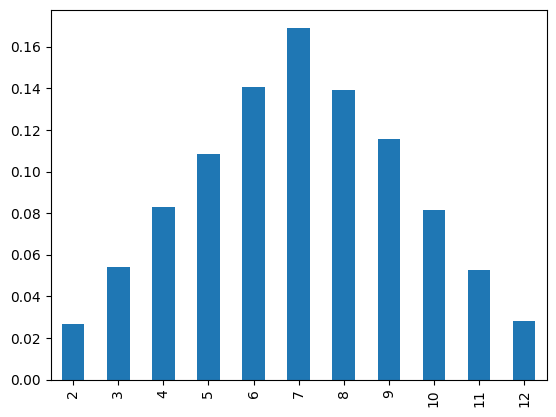

In [101]:
# See the pdf of sample
s.plot(kind='bar')

# CDF
![link text](https://qph.cf2.quoracdn.net/main-qimg-e50787cd6024e1945ef5632192b70a69)

<Axes: >

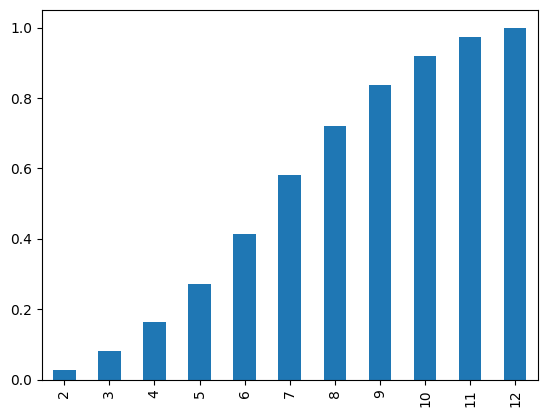

In [102]:
# draw an cdf to understand the graph
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

![i](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQov-os8aLKKbQMbRRDTDSVVeMl9OJyRZMPgw&s)

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [104]:
sample.mean()

49.91421879426369

(array([  6.,  22.,  92., 187., 258., 213., 131.,  61.,  26.,   4.]),
 array([34.24853251, 37.49456144, 40.74059036, 43.98661928, 47.23264821,
        50.47867713, 53.72470606, 56.97073498, 60.21676391, 63.46279283,
        66.70882175]),
 <BarContainer object of 10 artists>)

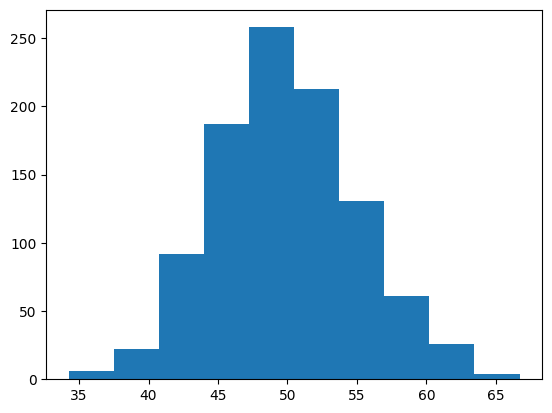

In [105]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [106]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()
sample_mean

49.91421879426369

In [107]:
sample_std

5.103413552694513

In [108]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [109]:
values = np.linspace(sample.min(),sample.max(),100)

In [110]:
sample.max()

66.70882175437055

In [111]:
probabilities = [dist.pdf(value) for value in values]

In [144]:
# plot the histogram and pdf

<ipython-input-113-8cd219d00d27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

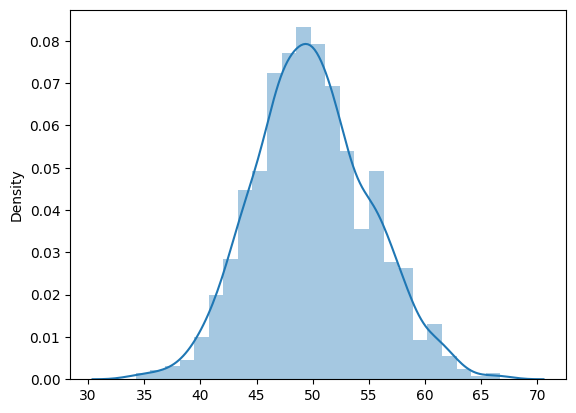

In [113]:
import seaborn as sns
sns.distplot(sample)

# KDE

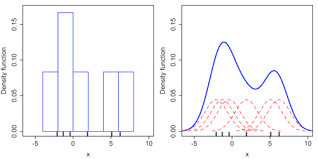

In [114]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [115]:
sample

array([15.892797  , 12.36948629, 15.78775597, 19.14018907, 12.54715285,
       19.37059333, 22.49604465, 21.78724074, 13.65538252, 25.64003956,
       15.12822831,  7.57805812, 23.22787253, 19.9838281 , 25.23089031,
       23.99606774, 25.63851539, 12.61824188, 24.38261326, 14.81519278,
       24.84495659, 25.98536012, 29.65003583, 12.91222578, 26.19086458,
       23.97162789, 20.78198411,  9.75282296, 18.59035183, 19.01907169,
       23.60096053, 19.79840165, 18.81030013, 14.27636424, 23.86150994,
       19.17502877, 16.60516725, 21.98625834, 13.71919448, 16.0027433 ,
       18.76960184, 13.0650812 , 25.70905926, 23.27779976, 21.28268463,
       26.70366058, 25.68713498, 27.53369   , 24.41851185, 21.8968787 ,
       21.0486953 , 17.57071487,  8.8644094 , 17.62761129, 22.89596964,
       21.19261971, 30.59487422, 22.44535994, 18.61254686, 22.28396208,
       18.20387664, 15.98791408, 18.31800162, 23.0030302 , 15.39605362,
       18.56458463, 32.87472997, 23.42645455, 26.54351335, 14.50

(array([ 4.,  4.,  5.,  4.,  2.,  7.,  9.,  9., 18., 22., 15., 21., 28.,
        23., 17., 15., 22., 20., 14., 15., 13., 14., 10., 10., 15., 10.,
        14., 25., 37., 40., 58., 57., 46., 49., 60., 51., 42., 33., 30.,
        37., 25., 18., 12.,  5.,  8.,  5.,  0.,  1.,  0.,  1.]),
 array([ 6.43610104,  7.43574881,  8.43539658,  9.43504435, 10.43469212,
        11.43433988, 12.43398765, 13.43363542, 14.43328319, 15.43293096,
        16.43257872, 17.43222649, 18.43187426, 19.43152203, 20.4311698 ,
        21.43081756, 22.43046533, 23.4301131 , 24.42976087, 25.42940864,
        26.4290564 , 27.42870417, 28.42835194, 29.42799971, 30.42764748,
        31.42729524, 32.42694301, 33.42659078, 34.42623855, 35.42588632,
        36.42553408, 37.42518185, 38.42482962, 39.42447739, 40.42412516,
        41.42377292, 42.42342069, 43.42306846, 44.42271623, 45.422364  ,
        46.42201176, 47.42165953, 48.4213073 , 49.42095507, 50.42060283,
        51.4202506 , 52.41989837, 53.41954614, 54.41919391,

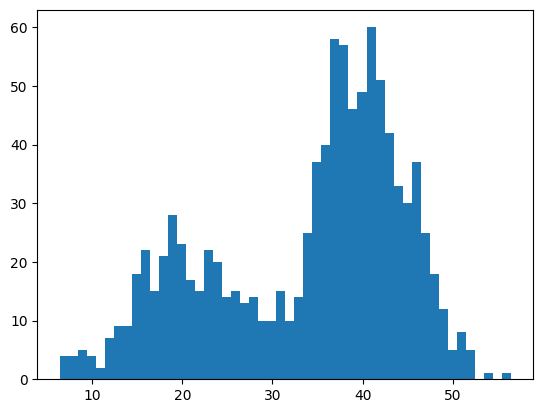

In [116]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [117]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [118]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [119]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

### kde
 `score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

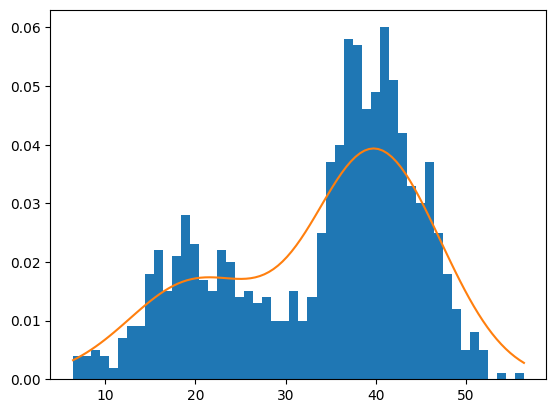

In [120]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

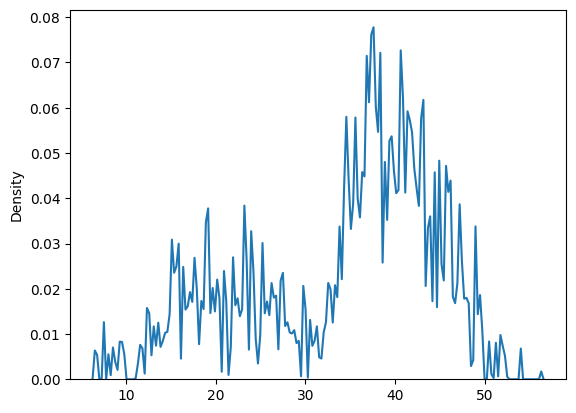

In [121]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

# where to use and how to use

In [122]:
import seaborn as sns

In [123]:
df = sns.load_dataset('iris')

In [124]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

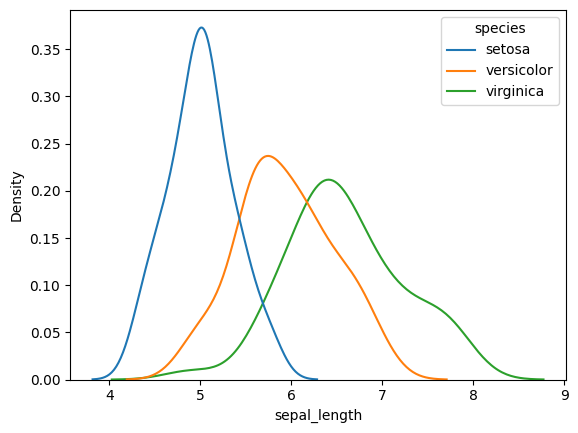

In [125]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

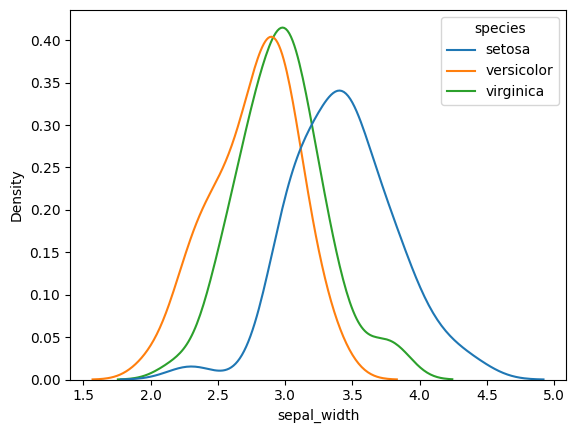

In [126]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

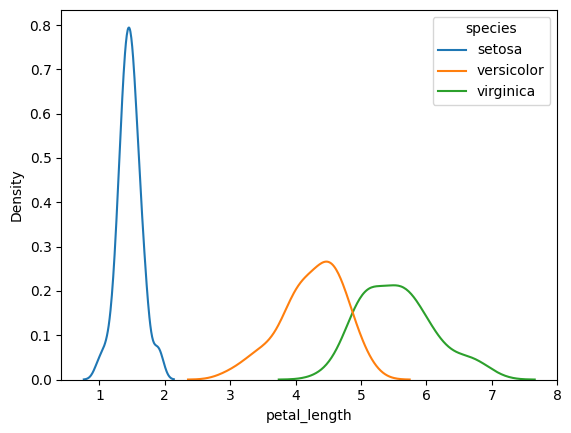

In [127]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

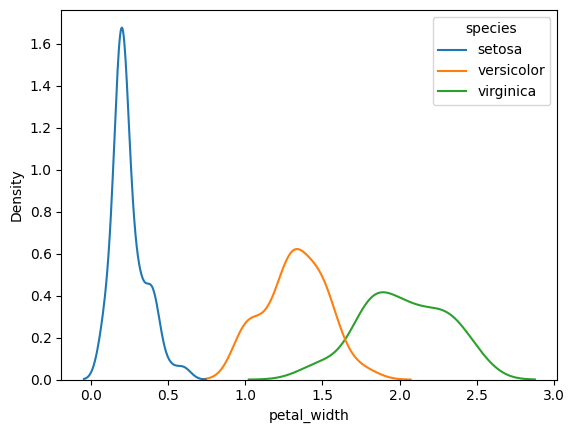

In [128]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

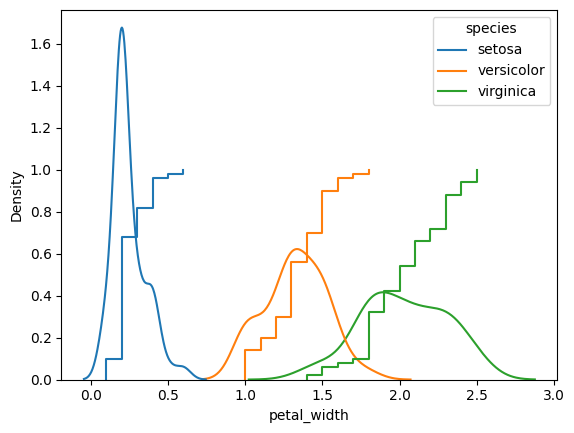

In [148]:
sns.kdeplot(data=df, x='petal_width', hue='species')
sns.ecdfplot(data=df, x='petal_width', hue='species')


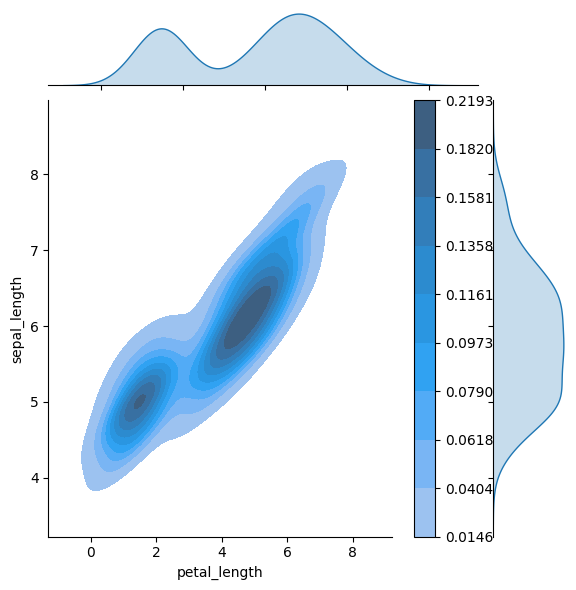

In [130]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

# Titanic

In [131]:


import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Density'>

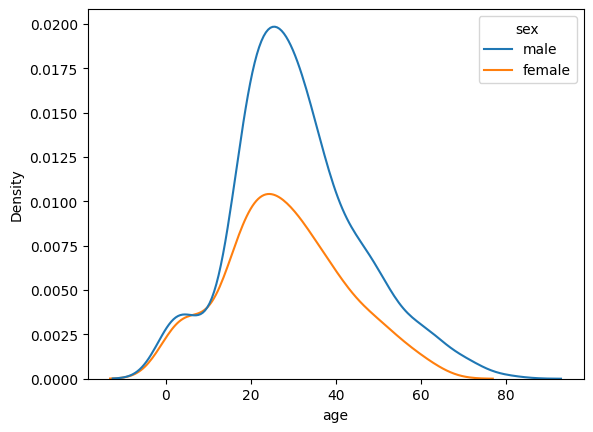

In [132]:
# code here
sns.kdeplot(data=titanic ,x='age',hue='sex')

<Axes: xlabel='age', ylabel='Density'>

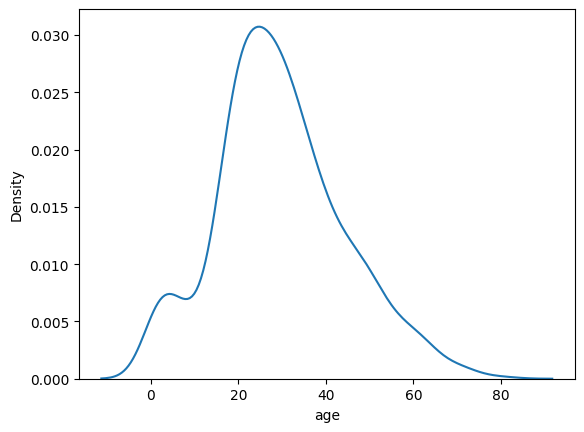

In [133]:
sns.kdeplot(titanic['age'])

In [134]:
titanic['age'].mean()

29.69911764705882

In [135]:
x = (titanic['age'] - titanic['age'].mean())/titanic['age'].std()

<Axes: xlabel='age', ylabel='Density'>

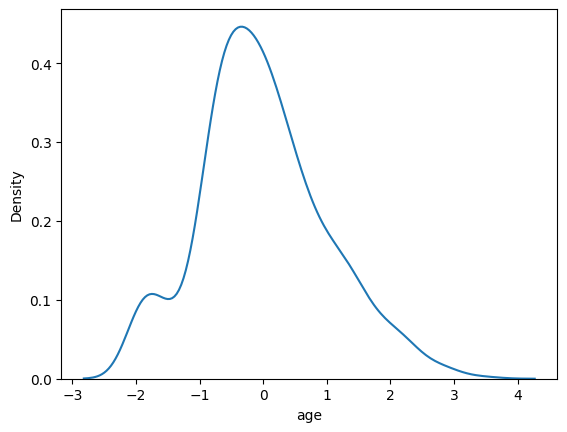

In [136]:
sns.kdeplot(x)

In [137]:
x.mean()

2.388378943731429e-16

In [138]:
x.std()

0.9999999999999994

In [139]:
titanic['age'].skew()

0.38910778230082704

In [140]:
titanic['age'].mean() + 3*titanic['age'].std()

73.27860964406095

In [141]:
titanic['age'].mean() - 3*titanic['age'].std()

-13.88037434994331

In [142]:
titanic[titanic['age'] > 73]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.775,S,Third,man,True,NaN,Southampton,no,True


In [143]:
titanic['age'].max()

80.0